# 서울시 자전거 따릉이 대여량 예측 
데이터 출처 : 데이콘

분석 단계 : 변수 설명 -> 데이터 시각화 -> 데이터 전처리 -> EDA -> 모델링 -> 모델 비교

In [1]:
import pandas as pd #데이터 조작 및 분석 라이브러리
import numpy as np #수치 연산을 위한 패키지
import seaborn as sns #데이터 시각화 라이브러리
import matplotlib.pyplot as plt #데이터 시각화를 위한 기본 라이브러리
from scipy import stats #과학적 계산을 위한 라이브러리
from scipy.stats import spearmanr #scipy 에서 spearmanr 
from scipy.stats import shapiro ##scipy 에서 shapiro

from sklearn.impute import KNNImputer #k-최근접 이웃(k-nearest neighbors) 방법을 위한 머신러닝 라이브러리

from sklearn.model_selection import train_test_split #데이터를 학습용과 테스트용으로 나누는 함수
from sklearn.linear_model import LinearRegression #선형 회귀 모델을 구현하는 클래스
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 회귀 모델을 구현하는 클래스
from sklearn.tree import DecisionTreeRegressor #결정 트리 회귀 모델을 구현하는 클래스
from sklearn.preprocessing import StandardScaler #특성 데이터를 표준화해주는 함수
from sklearn.metrics import mean_absolute_error #회귀 모델의 성능을 평가하는 데 사용되는 지표


In [2]:
pip install --user tensorflow 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf #오픈소스 딥러닝 프레임워크
from tensorflow.keras.models import Sequential #텐서플로우에 통합된 고수준 신경망 API
from tensorflow.keras.layers import Dense #전 연결층(fully connected layer)을 구현하는 케라스 레이어

pd.read_csv를 이용하여 데이터 불러오기

In [4]:
# 데이터 불러오기
file_path = 'C:/Users/82109/OneDrive/바탕 화면/통전처_프로젝트/train.csv'
data = pd.read_csv(file_path)

#    변수설명 

    id - > 고유 id
    hour - > 시간
    temperature - >  기온
    precipitation - > 비가 오지 않았으면 0, 비가 오면 1
    windspeed - > 풍속(평균)
    humidity - > 습도
    visibility - > 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
    ozone - > 오존
    pm10 - > 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
    pm2.5  -> 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
    count  -> 시간에 따른 따릉이 대여 수
 

In [5]:
#데이터 기본 정보 확인
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [6]:
#데이터 첫 몇 행 확인
data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


stats.describe를 이용한 count의 기술통계량

In [7]:
stats.describe(data['count'])

DescribeResult(nobs=1459, minmax=(1.0, 431.0), mean=108.56339958875942, variance=6828.003350849137, skewness=0.9115952317125152, kurtosis=0.45464241915692805)

# 데이터 시각화

hour - > 시간

hist를 이용한 hour의 histogram

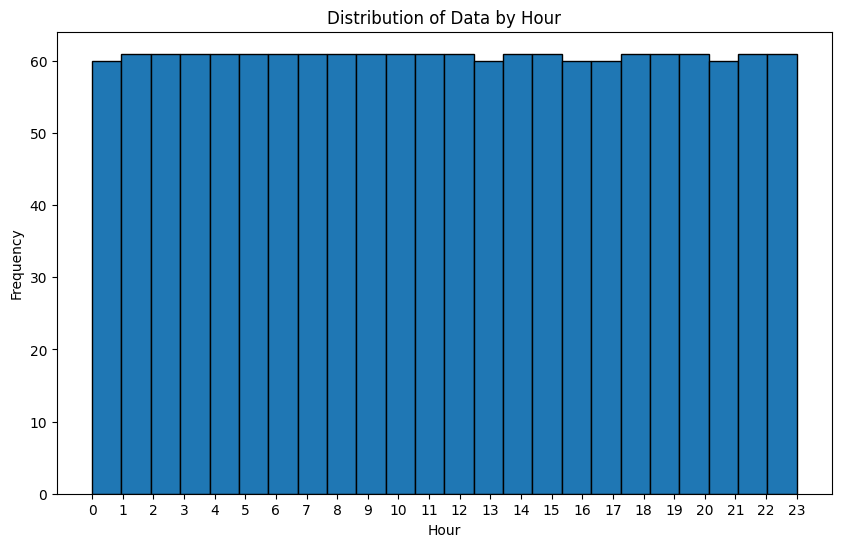

In [8]:
# 시간(hour)대별 데이터 분포 (histogram)

plt.figure(figsize=(10, 6)) # 새로운 그림 창을 생성
data['hour'].hist(bins=24, edgecolor='black') #histogram 생성, 구간 나누기, 경계선 설정
plt.title('Distribution of Data by Hour') #제목 설정
plt.xlabel('Hour') #x축 레이블 설정
plt.ylabel('Frequency') #y축 레이블 설정
plt.xticks(range(0, 24)) #x축 눈금 설정
plt.grid(False) #그리드 비활성
plt.show() # 출력

hour_bef_temperature - >  기온

sns.histpot을 이용한 hour_bef_temperature의 histogram

c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


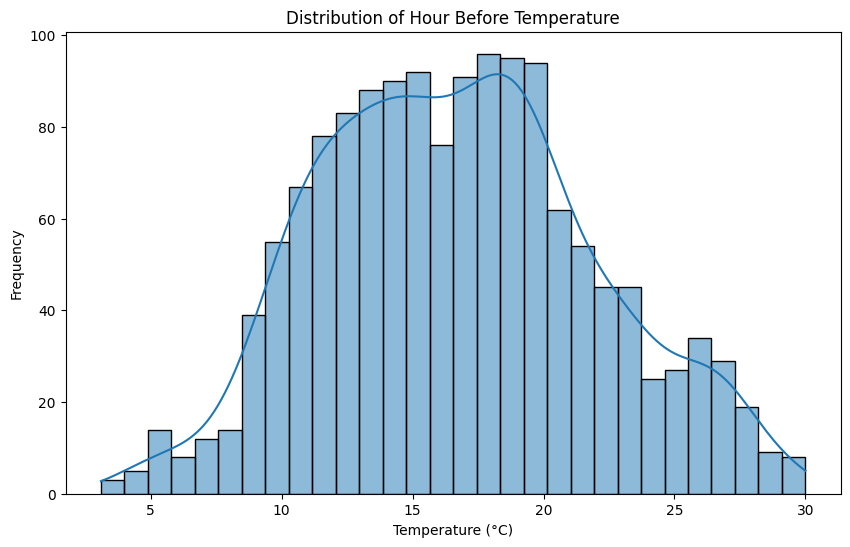

In [9]:
# 'hour_bef_temperature' 열의 (histogram)

plt.figure(figsize=(10, 6))
sns.histplot(data['hour_bef_temperature'], kde=True, bins=30) #sns.histplot 사용하여 histogram으로 나타냄, 커널 밀도 추정 그래프 추가
plt.title('Distribution of Hour Before Temperature') 
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

hour_bef_precipitation - > 비가 오지 않았으면 0, 비가 오면 1


sns.barplot을 이용한 hour_bef_precipitation 의 빈도에 대한 barplot

c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


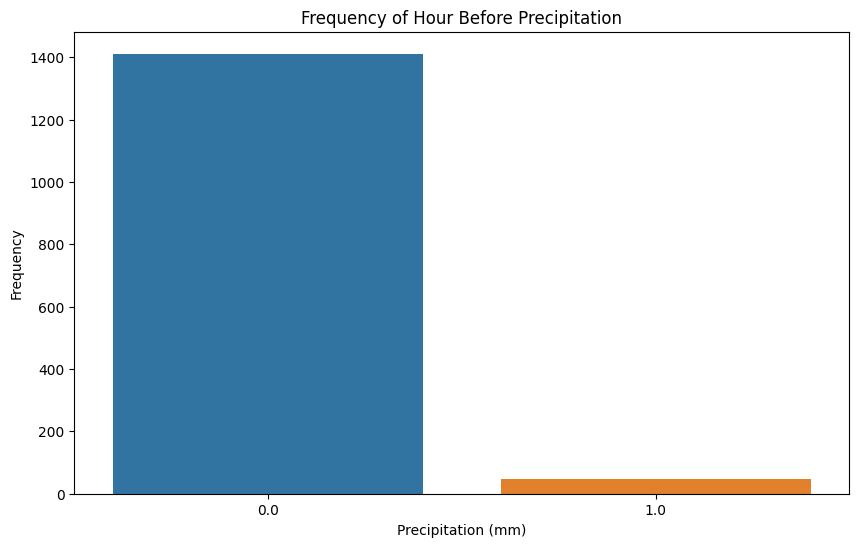

In [10]:
# "hour_bef_precipitation" 열의 빈도분석 (barplot)
precipitation_counts = data['hour_bef_precipitation'].value_counts() #hour_bef_precipitation 열의 고유 값별 빈도 계산
plt.figure(figsize=(10, 6))
sns.barplot(x=precipitation_counts.index, y=precipitation_counts.values) #sns.barplot 사용하여 빈도를 막대 그래프로 나타냄
plt.title('Frequency of Hour Before Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

hour_bef_windspeed - > 풍속(평균)

 

sns.lineplot을 이용한 시간대별 평균 hour_bef_windspeed 의 lineplot

c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

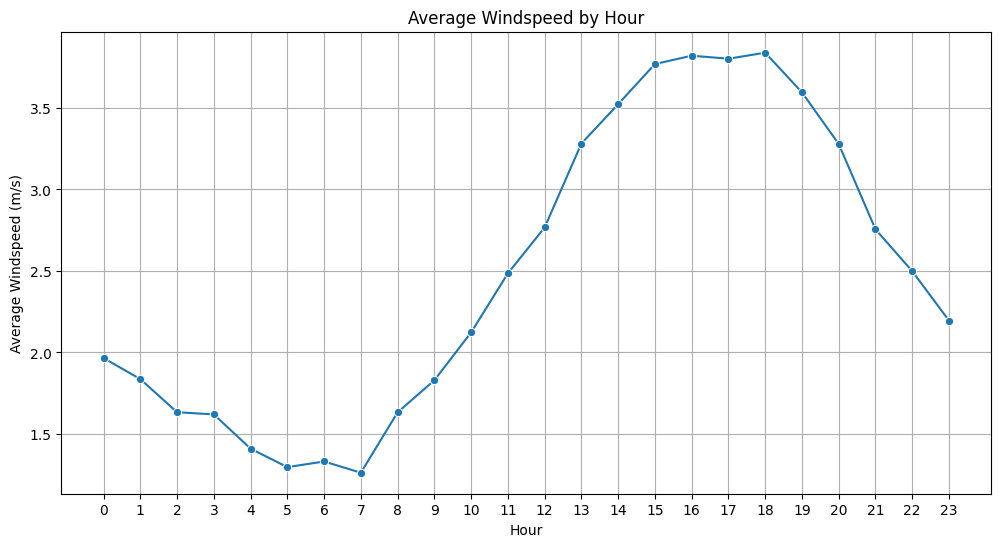

In [11]:
# 시간대별 평균 "hour_bef_windspeed" (line plot)
hourly_avg_windspeed = data.groupby('hour')['hour_bef_windspeed'].mean().reset_index() # 'hour' 열을 기준으로 데이터를 그룹화후, 각 그룹의 'hour_bef_windspeed' 평균 계산

# 선 그래프로 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='hour_bef_windspeed', data=hourly_avg_windspeed, marker='o') #sns.lineplot 사용하여 시간대별 평균 풍속을 선 그래프로 나타냄
plt.title('Average Windspeed by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Windspeed (m/s)')
plt.xticks(range(0, 24))
plt.grid(True) #그리드 활성화
plt.show()

hour_bef_humidity -> 습도

sns.boxplot을 이용한 hour_bef_humidity 의 boxplot

c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


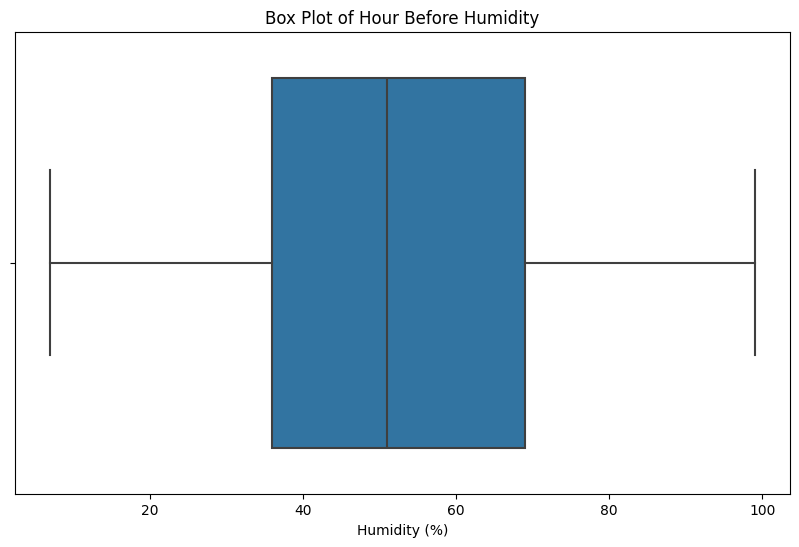

In [12]:
# 'hour_bef_humidity' 열의 (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['hour_bef_humidity']) #sns.boxplot 사용하여 습도 박스플롯 나타냄
plt.title('Box Plot of Hour Before Humidity')
plt.xlabel('Humidity (%)')
plt.show()

hour_bef_visibility -> 가시성

sns.stripplot을 이용한 시간대 별 hour_bef_visibility 분포의 stripplot <창조적함수>

c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

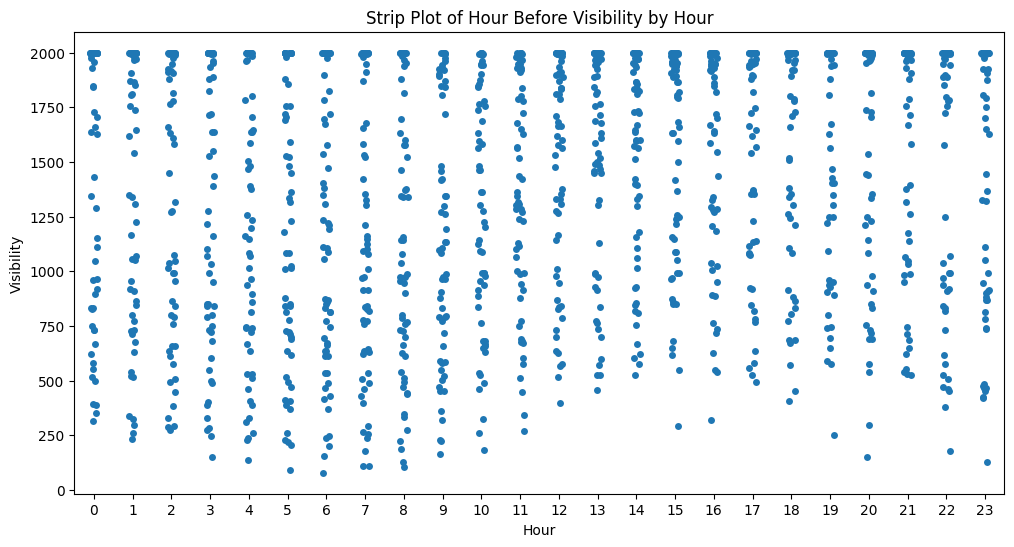

In [13]:
# 'hour_bef_visibility' 열의 (strip plot)
plt.figure(figsize=(12, 6))
sns.stripplot(x='hour', y='hour_bef_visibility', data=data, jitter=True) # sns.stripplot응 사용하여 'hour'에 따라 'hour_bef_visibility'의 분포를 나타냄, 데이터 포인트를 수평으로 분산시켜 중복 피함 
plt.title('Strip Plot of Hour Before Visibility by Hour')
plt.xlabel('Hour')
plt.ylabel('Visibility')
plt.xticks(range(0, 24))
plt.show()

hour_bef_ozone -> 오존량

sns.violinplot을 이용한 시간대별 hour_bef_ozone의 분포의 violinplot <창조적 함수>

c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


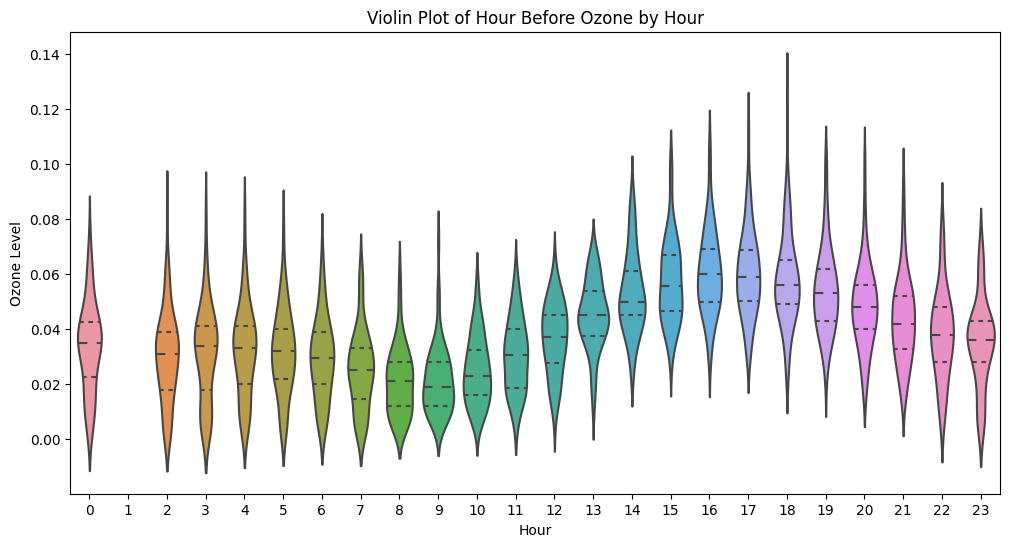

In [14]:
# 'hour_bef_ozone' 열의 (violin plot)
plt.figure(figsize=(12, 6))
sns.violinplot(x='hour', y='hour_bef_ozone', data=data, inner='quartile') #sns.violinplot를 사용하여 'hour'에 따라 'hour_bef_ozone'의 분포를 나타냄, 사분위수를 표시
plt.title('Violin Plot of Hour Before Ozone by Hour')
plt.xlabel('Hour')
plt.ylabel('Ozone Level')
plt.xticks(range(0, 24))
plt.show()

hour_bef_pm10, hour_bef_pm2.5 -> 미세먼지

sns.lineplot을 이용한 시간대별 hour_bef_pm10, hour_bef_pm2.5의 평균 분포를 같이 나타낸 lineplot

c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

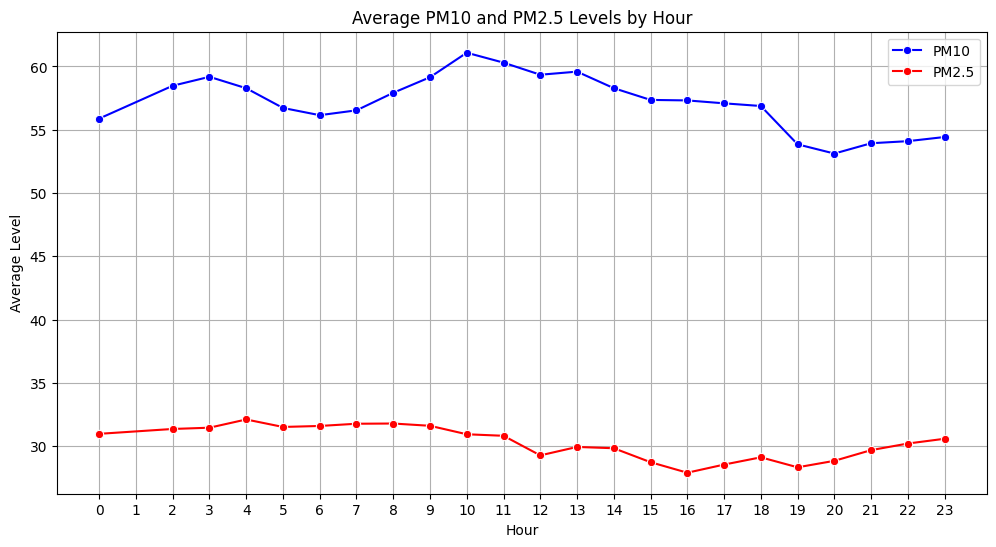

In [15]:
# 시간대별 'hour_bef_pm10','hour_bef_pm2.5' 의  (lineplot)

hourly_avg_pm10 = data.groupby('hour')['hour_bef_pm10'].mean().reset_index() # 시간대별 'hour_bef_pm10'의 평균 계산
hourly_avg_pm2_5 = data.groupby('hour')['hour_bef_pm2.5'].mean().reset_index() # 시간대별 'hour_bef_pm2.5'의 평균 계산

# 선 그래프로 시각화
plt.figure(figsize=(12, 6))

sns.lineplot(x='hour', y='hour_bef_pm10', data=hourly_avg_pm10, marker='o', label='PM10', color='blue')
sns.lineplot(x='hour', y='hour_bef_pm2.5', data=hourly_avg_pm2_5, marker='o', label='PM2.5', color='red')

plt.title('Average PM10 and PM2.5 Levels by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Level')
plt.xticks(range(0, 24))
plt.legend() #범례 추가
plt.grid(True)
plt.show()

# 데이터 전처리

결측치 처리

In [16]:
#결측치 확인
data.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

hour_bef_temperature -> 기온

np.namean, fillna, np.round를 이용하여 hour_bef_temperature의 결측치를 소수점 한자리까지의 평균값으로 채움

In [17]:
# 'hour_bef_temperature' 열의 결측치를 평균값으로 채우기
mean_temperature = np.nanmean(data['hour_bef_temperature']) # np.nanmean를 이용하여 hour_bef_temperature' 열의 평균 구하기
data['hour_bef_temperature'].fillna(np.round(mean_temperature), inplace=True) #'hour_bef_temperature' 열의 결측치를 계산된 소수졈 한자리까지의 평균값으로 채움

# 결과 확인
print(data['hour_bef_temperature'].isnull().sum())# 결측치가 0이어야 함

0


hour_bef_precipitation -> 강수유무

np.bicount, fillna를 이용하여 hour_bef_precipitation의 결측치를 최빈값으로 채움

In [18]:
# 'hour_bef_precipitation' 열의 결측치를 최빈값으로 채우기
mode_precipitation =np.bincount(data['hour_bef_precipitation'].dropna().astype(int)).argmax()# np.bincount를 이용하여 'hour_bef_precipitation' 열의 최빈값 구하기
data['hour_bef_precipitation'].fillna(mode_precipitation, inplace=True) # 'hour_bef_precipitation' 열의 결측치를 최빈값으로 채우기

# 결과 확인
print(data['hour_bef_precipitation'].isnull().sum())  # 결측치가 0이어야 함

0


hour_bef_windspeed -> 풍속

np.namedian, fillna, np.round를 이용하여 hour_bef_windspeed의 결측치를 소수점 한자리까지의 중앙값으로 채움

In [19]:
# 'hour_bef_windspeed' 열의 결측치를 중앙값으로 채우기
median_windspeed = np.nanmedian(data['hour_bef_windspeed']) #np,namedian를 이용하여 'hour_bef_windspeed'의 중앙값 구하기
data['hour_bef_windspeed'].fillna(np.round(median_windspeed), inplace=True) # 'hour_bef_windspeed' 열의 결측치를 소수졈 한자리까지의 중앙값으로 채우기

# 결과 확인
print(data['hour_bef_windspeed'].isnull().sum())  # 결측치가 0이어야 함

0


hour_bef_humidity -> 습도

사용자 정의 함수를 이용하여 'hour_bef_humidity' 열의 결측치를 같은 기온일 때의 평균값으로 채움

pd.notna를 이용하여 평균값이 NaN 아닌 경우에만 채우게끔 조건을 만듦

In [20]:
# 'hour_bef_humidity' 열의 결측치를 같은 기온일 때의 평균값으로 채우는 사용자 함수 정의
def fill_humidity_by_temperature(df):
    for temp in df['hour_bef_temperature'].dropna().unique(): #'hour_bef_temperature' 열에서 결측치를 제외한 고유한 기온값들을 반복
        mean_humidity = df.loc[df['hour_bef_temperature'] == temp, 'hour_bef_humidity'].mean()  # 해당 기온값을 가지는 행들의 'hour_bef_humidity' 평균값 계산
        mean_humidity = int(np.round(mean_humidity))  # 평균값을 반올림하여 정수로 변환
        if pd.notna(mean_humidity):  # 평균값이 NaN이 아닌 경우에만 채우기
            df.loc[(df['hour_bef_temperature'] == temp) & (df['hour_bef_humidity'].isnull()), 'hour_bef_humidity'] = mean_humidity
    return df

# 결측치 채우기
data = fill_humidity_by_temperature(data)

# 결과 확인
print(data['hour_bef_humidity'].isnull().sum())  # 결측치가 0이어야 함

0


hour_bef_visibility -> 가시성

np.namean, fillna를 이용하여 hour_bef_visibility의 결측치를 평균값로 채움

In [21]:
# 'hour_bef_visibility' 열의 결측치를 평균값로 채우기
mean_visibility = int(np.round(np.nanmean(data['hour_bef_visibility']))) # 'hour_bef_visibility' 열의 평균값 정수로 구하기
data['hour_bef_visibility'].fillna(mean_visibility, inplace=True) # 'hour_bef_visibility' 열의 결측치 평균값으로 채우기

# 결과 확인
print(data['hour_bef_visibility'].isnull().sum())  # 결측치가 0이어야 함

0


hour_bef_ozone -> 오존량

'hour_bef_ozone'를  hour_bef_temperature'를 이용한 단순 선형회귀직선의 값으로 채움 (오존량은 기온에 영향을 많이 받기 때문)

In [22]:
# 'hour_bef_ozone'를  hour_bef_temperature'를 이용한 단순 선형회귀직선의 값으로 채우기

variable = 'hour_bef_temperature' # 사용할 변수 선택 (기온을 이용한 단순 회귀 분석 수행)
data_non_null = data.dropna(subset=[variable, 'hour_bef_ozone']) # 결측치 제거

X = data_non_null[variable] # 독립 변수(X) 설정
y = data_non_null['hour_bef_ozone'] #종속 변수(y) 설정
 
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y) # scipy의 stats.linregress를 이용한 단순 선형 회귀 분석 수행

# 회귀선을 이용하여 결측치를 채우는 사용자 장의 함수
def predict_ozone(temp):
    return round(slope * temp + intercept,3) #소수점 3자리까지만

# 결측치 채우기
ozone_missing = data['hour_bef_ozone'].isnull()
data.loc[ozone_missing, 'hour_bef_ozone'] = data.loc[ozone_missing, variable].apply(predict_ozone)

# 결과 확인
print(data['hour_bef_ozone'].isnull().sum())  # 결측치가 0이어야 함

0


hour_bef_pm10 와 hour_bef_pm2.5 -> 미세먼지

K-최근접 이웃(K-Nearest Neighbors, KNN) 알고리즘을 사용하여 hour_bef_pm10와 hour_bef_pm2.5 열의 결측치를 채움 <창조적 함수>

In [23]:
#K-최근접 이웃(K-Nearest Neighbors, KNN) 알고리즘을 사용하여 hour_bef_pm10와 hour_bef_pm2.5 열의 결측치를 채우기
# KNN은 각 샘플의 K개의 최근접 이웃을 기반으로 결측치를 채우는 방법

# 사용할 변수 선택
variables = ['hour_bef_temperature', 'hour_bef_humidity', 'hour_bef_windspeed', 'hour_bef_precipitation', 'hour_bef_pm10', 'hour_bef_pm2.5'] # KNN Imputer는 여러 변수를 사용하여 결측치를 채우는데 그중 영향력 있어보이는 변수들을 선택

# 필요한 열만 선택하여 데이터프레임 생성
data_knn = data[variables] # 선택한 변수들만 포함된 데이터프레임을 생성하여 KNN Imputer에 전달

# KNN Imputer 정의
imputer = KNNImputer(n_neighbors=5, weights='uniform') # KNNImputer는 K-최근접 이웃 알고리즘을 사용하여 결측치를 채우는 Imputer, n_neighbors는 사용할 이웃의 수를 나타내며, weights는 uniform으로 설정하여 모든 이웃에 동일한 가중치를 부여

# 데이터프레임에 KNN 적용하여 결측치 채우기
data_filled = imputer.fit_transform(data_knn)

# 데이터프레임으로 변환
data_filled = pd.DataFrame(data_filled, columns=variables)

# 채워진 값을 정수로 반올림
data_filled = data_filled.round(0).astype(int)

# 원본 데이터프레임에 채워진 값을 반영
data[variables] = data_filled

# 결과 확인
print(data['hour_bef_pm10'].isnull().sum())  # 결측치가 0이어야 함
print(data['hour_bef_pm2.5'].isnull().sum())  # 결측치가 0이어야 함

0
0


In [24]:
#결측치 재확인
data.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

# EDA

상관관계

sns.heatmap을 이용하여 변수간 상관관계 분석

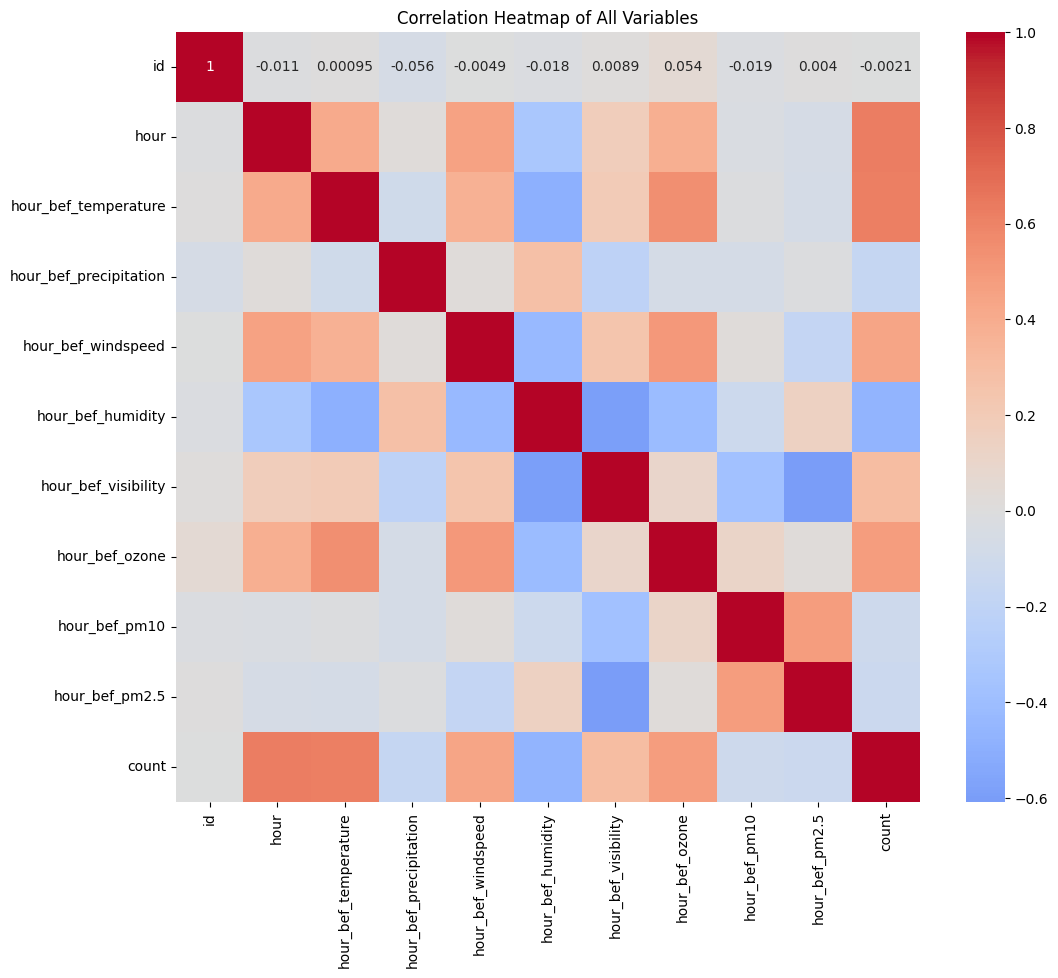

In [25]:
#상관관계 행렬 계산
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0) #sns.heatmap() 함수를 사용하여 상관관계 행렬의 히트맵을 생성
plt.title('Correlation Heatmap of All Variables')
plt.show()

heatmap에서 높은 상관계수를 보이는 변수들의 scipy stats에서의 spearmanr을 이용한 spearman 상관계수 값 출력

In [26]:
selected_columns = ['count', 'hour', 'hour_bef_windspeed', 'hour_bef_visibility', 'hour_bef_ozone'] #상관계수 높은 것들만 뽑음

#높은 상관계수를 가져 보이는 변수들의 spearman_corr 값
spearman_corrs = {}
for col in selected_columns[1:]:
    spearman_corr, _ = spearmanr(data['count'], data[col])
    spearman_corrs[col] = spearman_corr

spearman_corrs

{'hour': 0.6773375886694095,
 'hour_bef_windspeed': 0.47899883704884944,
 'hour_bef_visibility': 0.2949348819548742,
 'hour_bef_ozone': 0.45081783100917183}

변수변환

hour_bef_pm10 와 hour_bef_pm2.5 -> 미세먼지

사용자 정의 함수를 이용하여 미세먼지의 수치형 데이터를 좋음, 보통 나쁨으로 범주화 진행 (범주화 기준은 미세먼지관련 정보를 참고)

In [27]:
# 미세먼지(PM) 농도 변수 변환 
# PM10 농도를 기준으로 상태를 분류하는 사용자 정의 함수 
def classify_pm10(value):
    if value <= 30:
        return '좋음'  # PM10 값이 30 이하이면 '좋음'으로 분류
    elif value <= 80:
        return '보통' # PM10 값이 31에서 80 사이이면 '보통'으로 분류
    else:
        return '나쁨' # PM10 값이 81 이상이면 '나쁨'으로 분류

def classify_pm2_5(value):
    if value <= 15:
        return '좋음' # PM2.5 값이 15 이하이면 '좋음'으로 분류
    elif value <= 35:
        return '보통' # PM2.5 값이 16에서 35 사이이면 '보통'으로 분류
    else:
        return '나쁨' # PM2.5 값이 36 이상이면 '나쁨'으로 분류

# Apply the classification to the dataframe
data['pm10_status'] = data['hour_bef_pm10'].apply(classify_pm10)
data['pm2_5_status'] = data['hour_bef_pm2.5'].apply(classify_pm2_5)


범주화한 pm10_status, pm2_5_status를 pd.get_dummies를 이용하여 원핫인코딩 진행

In [28]:
#미세먼지 농도 변수 원핫인코딩
data = pd.get_dummies(data, columns=['pm10_status', 'pm2_5_status'])

hour_bef_visibility -> 가시성

사용자 정의 함수를 이용하여 hour_bef_visibility의 수치형 데이터를 좋음, 나쁨으로 범주화함 (범주화 기준은 가시성관련 정보 참고)

In [29]:
# 가시성 (visibility) 변수 변환 
# 가시성을 1700을 기준으로 분류하는 사용자 정의 함수
def classify_visibility(value):
    return '좋음' if value >= 1700 else '나쁨' # 1700 이상이면 '좋음', 그렇지 않으면 '나쁨'

# 데이터프레임에 분류를 적용
data['visibility_status'] = data['hour_bef_visibility'].apply(classify_visibility)

범주화한 visibility_status를 pd.get_dummies를 이용하여 원핫인코딩 진행

In [30]:
# 가시성 (visibility) 변수 원핫 인코딩
data= pd.get_dummies(data, columns=['visibility_status'])

hour_bef_humidity, hour_bef_ozone -> 습도, 오존량

수치형 데이터인 hour_bef_humidity, hour_bef_ozone의 변수변환을 고려할지 말지 histogram일 이용하여 확인

c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

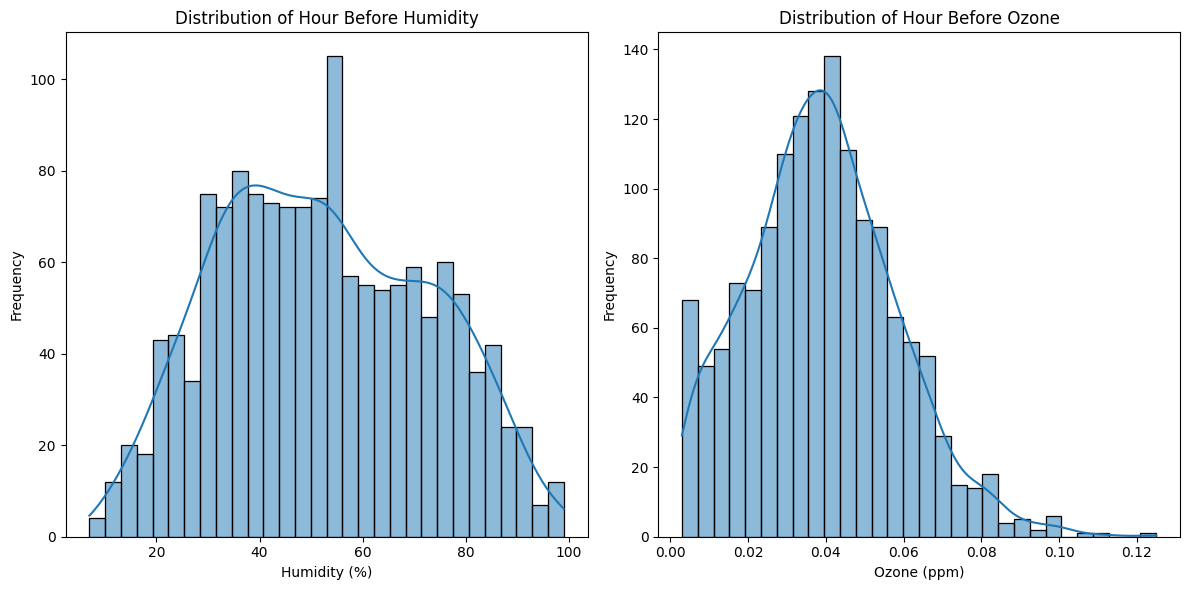

In [31]:
#연속형 변수인 습도, 오존 분포 확인 후 변환 필요성 확인 
plt.figure(figsize=(12, 6))

# humidity
plt.subplot(1, 2, 1)
sns.histplot(data['hour_bef_humidity'], bins=30, kde=True)
plt.title('Distribution of Hour Before Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
#습도 같은 경우 꽤나 대칭적인 모양을 가지므로 변환 안해도 된다고 판단

# ozone
plt.subplot(1, 2, 2)
sns.histplot(data['hour_bef_ozone'], bins=30, kde=True)
plt.title('Distribution of Hour Before Ozone')
plt.xlabel('Ozone (ppm)')
plt.ylabel('Frequency')
#오존 같은 경우 오른쪽 꼬리 분포가 보이기에 변화 필요하다 판단

plt.tight_layout()
plt.show()


scipy.stats의 shapiro를 이용한 'hour_bef_humidity', 'hour_bef_ozone'  shapiro 검정으로 정규성 확인

In [32]:
#'hour_bef_humidity', 'hour_bef_ozone'  샤피로 검정으로 정규성 확인
shapiro_stat_humidity, shapiro_p_value_humidity = shapiro(data['hour_bef_humidity'].dropna())
shapiro_stat_ozone, shapiro_p_value_ozone = shapiro(data['hour_bef_ozone'].dropna())

shapiro_stat_humidity, shapiro_p_value_humidity, shapiro_stat_ozone, shapiro_p_value_ozone


(0.9816278219223022,
 1.0776731070027967e-12,
 0.9847613573074341,
 2.8014892489158782e-11)

hour_bef_ozone -> 오존량

hour_bef_ozone은 오른쪽으로 긴 꼬리 형태를 확인 할 수 있었기에 np.sqrt를 이용하여 제곱근 변환 진행

c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\82109\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


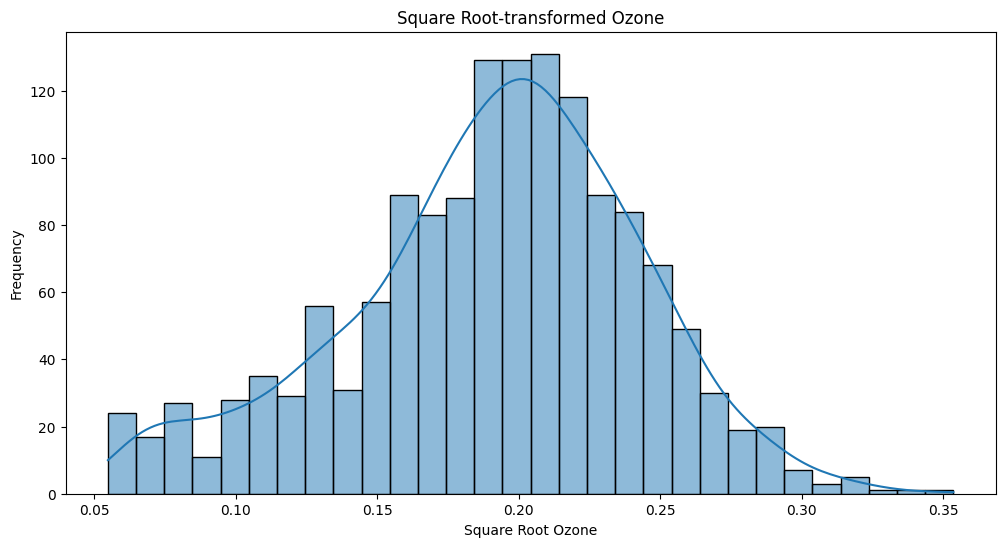

In [33]:
# ozone 제곱근 변환 적용
data['sqrt_ozone'] = data['hour_bef_ozone'].apply(lambda x: np.sqrt(x))

# 제곱근 변환된 오존 값의 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data['sqrt_ozone'], bins=30, kde=True)
plt.title('Square Root-transformed Ozone')
plt.xlabel('Square Root Ozone')
plt.ylabel('Frequency')
plt.show()
#변환 후 꽤나 대칭적인 모양 확인

In [34]:
#데이터 최종
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   int32  
 3   hour_bef_precipitation  1459 non-null   int32  
 4   hour_bef_windspeed      1459 non-null   int32  
 5   hour_bef_humidity       1459 non-null   int32  
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1459 non-null   int32  
 9   hour_bef_pm2.5          1459 non-null   int32  
 10  count                   1459 non-null   float64
 11  pm10_status_나쁨          1459 non-null   bool   
 12  pm10_status_보통          1459 non-null   bool   
 13  pm10_status_좋음          1459 non-null   bool   
 14  pm2_5_status_나쁨         1459 non-null   

# 모델링

단순회귀모델

기본적인 변수들을 활용한 회귀모델이 아닌 변수들끼리의 곱, 제곱, 나누기 등 다양한 변수들 끼리의 경우의 수 고려

In [35]:
#단순회귀모델

# 창조적 함수 적용
def create_features(df):
    df['temp_humidity'] = df['hour_bef_temperature'] * df['hour_bef_humidity']
    df['wind_speed_squared'] = df['hour_bef_windspeed'] ** 2
    df['temp_wind'] = df['hour_bef_temperature'] / (df['hour_bef_windspeed'] + 1)  # 바람 속도가 0이 되는 경우를 방지
    return df

# 기존 데이터에서 창조적 함수 적용
features = data.drop(columns=['id', 'count', 'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'])
features = create_features(features)
target = data['count']

# 데이터를 훈련 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 특징을 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형 회귀 모델을 초기화 및 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 테스트 데이터로 모델을 평가
y_pred = model.predict(X_test_scaled)
test_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {test_mae:.4f}')



Test MAE: 38.7824


Decision Tree Regressor 모델 <창조적 함수>

In [36]:
#Decision Tree Regressor 모델

# 특징과 타겟 설정
features = data.drop(columns=['id', 'count', 'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'])
target = data['count']

# 데이터를 훈련 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 특징을 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 디시전 트리 리그레서를 초기화
model = DecisionTreeRegressor(random_state=42)

# 모델을 훈련
model.fit(X_train_scaled, y_train)

# 테스트 데이터로 모델을 평가
y_pred = model.predict(X_test_scaled)
test_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {test_mae:.4f}')

Test MAE: 33.4692


랜덤포레스트 모델 <창조적 함수>

In [37]:
#랜덤포레스트 모델

# 관련 특성 선택
features = data.drop(columns=['id', 'count', 'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'])
# 예측하려는 목표 변수 선택
target = data['count']

# 데이터 세트를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# RandomForestRegressor 초기화
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 훈련
rf_model.fit(X_train, y_train)

# 예측 수행
y_pred = rf_model.predict(X_test)

# 모델 평가
# 평균 절대 오차 계산
mae = mean_absolute_error(y_test, y_pred)

(mae)


26.151027397260275

tensorflow

C:\Users\82109\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 19941.7148 - mae: 111.2053 - val_loss: 18035.7949 - val_mae: 108.9687
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16498.5625 - mae: 101.5462 - val_loss: 16791.0723 - val_mae: 104.3145
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15993.2285 - mae: 98.7598 - val_loss: 14251.8711 - val_mae: 94.7817
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13575.2227 - mae: 89.4262 - val_loss: 10280.0693 - val_mae: 78.8206
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8825.6465 - mae: 71.2600 - val_loss: 6106.6123 - val_mae: 58.4215
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5714.8071 - mae: 55.2552 - val_loss: 3789.4934 - val_mae: 46.0433
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3651.1533 - mae: 43.8606 - val_loss: 3147.6780 - val_mae: 42.4373
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3210.6565 - mae: 42.0402 - val_loss: 2931.1108 - val_m

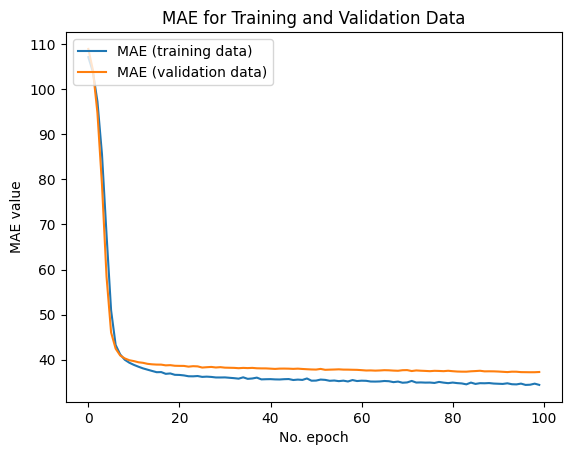

In [38]:
# TensorFlow, Keras module 사용한 모델
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# 데이터를 훈련 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 특징을 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # 훈련 세트에 맞추어 변환
X_test_scaled = scaler.transform(X_test) # 테스트 세트를 변환

# 모델을 구성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)), # 입력층과 첫 번째 은닉층
    Dense(32, activation='relu'),  # 두 번째 은닉층
    Dense(1) # 출력층 (회귀 문제이므로 활성화 함수 없음)
])

# 모델을 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델을 훈련
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32)

# 테스트 데이터로 모델을 평가
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test MAE: {test_mae:.4f}')

# 훈련 기록을 플로팅
plt.plot(history.history['mae'], label='MAE (training data)') # 훈련 데이터의 MAE
plt.plot(history.history['val_mae'], label='MAE (validation data)') # 검증 데이터의 MAE
plt.title('MAE for Training and Validation Data')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


# 모델 비교

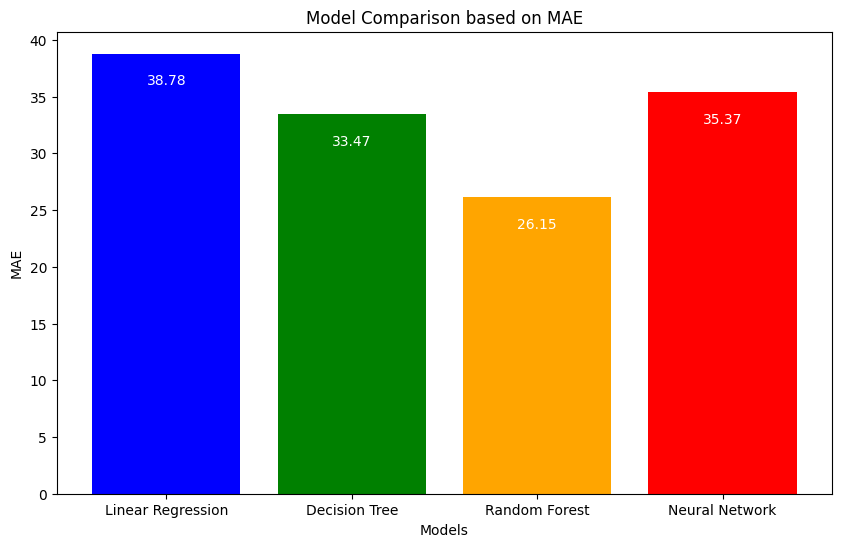

In [39]:
# 각 모델의 MAE 값을 저장
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network']
mae_values = [38.7824, 33.4692, 26.151027397260275, 35.3747]

# 막대그래프를 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mae_values, color=['blue', 'green', 'orange', 'red'])

# MAE 값을 막대 위에 표시
for bar, mae in zip(bars, mae_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 3, round(mae, 2), ha='center', va='bottom', color='white')

plt.title('Model Comparison based on MAE')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.show()
